# Autoencoder

Este código demonstra como implementar e treinar um autoencoder simples com o Keras usando o dataset MNIST, que contém imagens de dígitos manuscritos. Vamos analisar as etapas:

# Pacotes

In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tf.keras.initializers.GlorotUniform(seed=seed)

2025-04-05 01:03:54.596308: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 01:03:59.193958: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 01:04:01.600955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743815045.314053    1943 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743815046.120995    1943 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-05 01:04:15.242028: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Carrega Dataset

## Carregar e preprocessar o dataset MNIST

O conjunto de dados MNIST é carregado com mnist.load_data(). Ele contém imagens de dígitos com dimensão
28
×
28
28×28.
Os passos de preprocessamento incluem:

Normalização: Dividir os valores de pixel por 255 para escalá-los para o intervalo [0, 1].
Achatamento das imagens: Cada imagem é convertida para um vetor de 784 elementos (
28
×
28
28×28).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


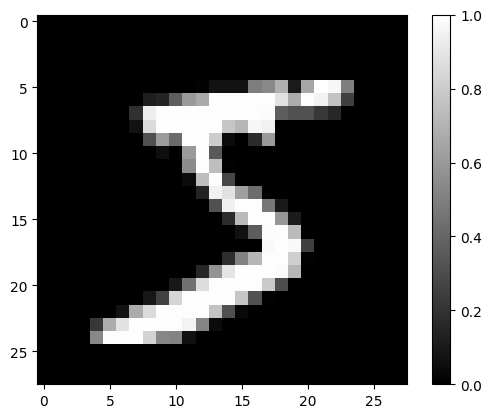

In [2]:
# Carregando o conjunto de dados MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizando os dados para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Exibir a primeira imagem do conjunto de treinamento
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

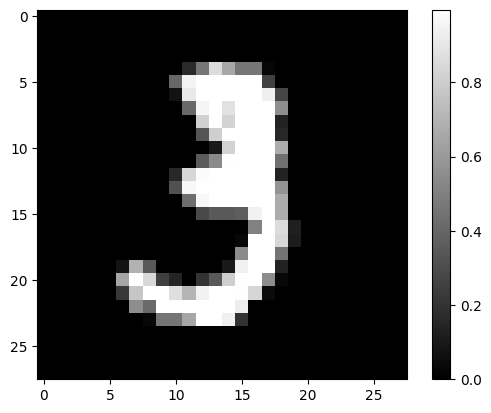

In [3]:
plt.imshow(x_train[10], cmap='gray')
plt.colorbar()
plt.show()

In [4]:
# Carregando o conjunto de dados MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizando os dados para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Achatando as imagens para o formato (número de amostras, altura * largura)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
x_train.shape

(60000, 784)

In [6]:
x_test.shape

(10000, 784)

# Treina o Autoencoder

# Definir a arquitetura do Autoencoder

O autoencoder é composto por duas partes principais:

- Encoder: Reduz a dimensionalidade dos dados de entrada, mapeando-os para uma representação mais compacta.

- Decoder: Reconstrói os dados originais a partir dessa representação compacta.
Neste exemplo:

O encoder tem uma camada com 128 neurônios e ativação relu.
O decoder reconstrói a imagem original com 784 neurônios e ativação sigmoid.

In [7]:
# Definindo a arquitetura do autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compilando o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Treinando o modelo
# passo o x_train e x_train pois não tenho o label, esse modelo é não supervisionado
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

2025-04-05 01:12:24.977580: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-04-05 01:12:25.192225: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2025-04-05 01:12:25.421286: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


228/235 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3176

2025-04-05 01:12:27.803248: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2025-04-05 01:12:27.812070: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3141 - val_loss: 0.1347
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1258 - val_loss: 0.1028
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1002 - val_loss: 0.0894
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0884 - val_loss: 0.0819
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0816 - val_loss: 0.0773
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0774 - val_loss: 0.0745
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0746 - val_loss: 0.0725
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0727 - val_loss: 0.0711
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0714 - val_loss: 0.0701
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0705 - val_loss: 0.0694
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.

# Compilar e treinar o modelo
O modelo é compilado com:

- Otimizador: adam (eficiente para treinamento de redes neurais).
- Função de perda: binary_crossentropy, uma escolha comum para autoencoders quando os valores estão normalizados no intervalo [0, 1].

O treinamento é realizado com os dados de entrada servindo como rótulos (pois o objetivo do autoencoder é reconstruir as entradas).

 59/313 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step

169/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step

2025-04-05 01:14:46.069147: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


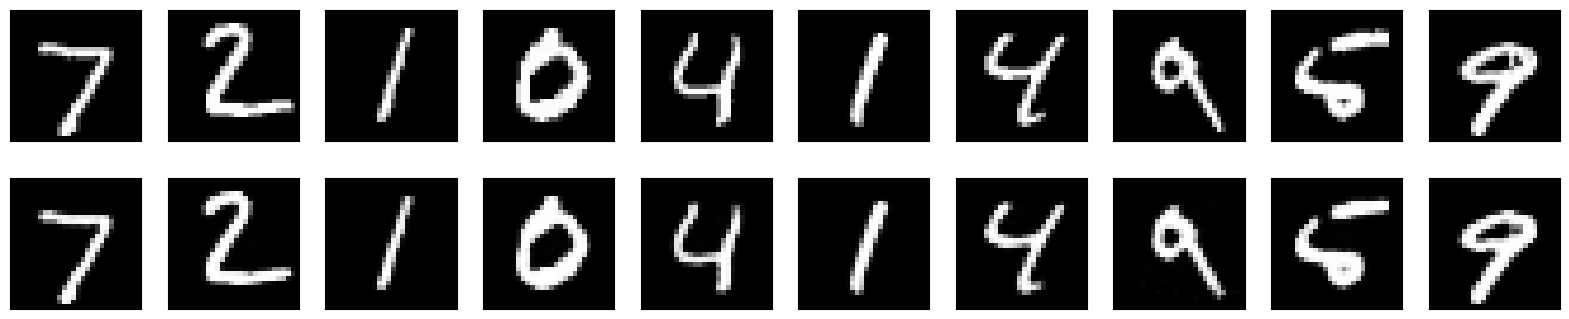

In [8]:
# Obtendo as imagens reconstruídas pelo autoencoder
decoded_imgs = autoencoder.predict(x_test)

# Visualizando as imagens originais e reconstruídas
n = 10  # Número de imagens para visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Resultados
Após o treinamento:

As imagens reconstruídas devem ser semelhantes às originais, embora possuam alguma perda de detalhes devido à compressão no encoder.
A visualização compara as imagens originais e reconstruídas para avaliar a qualidade da reconstrução.